Julian Francisco Pinchao Ortiz

# Colision de dos cuerpos por Euler-Cromer 

Una colisión entre dos o más objetos es un proceso.

• donde las fuerzas internas entre los objetos son mucho mayores que las fuerzas externas del entorno

• que ocurren en un intervalo de tiempo corto en comparación con la escala de tiempo del movimiento.

Si conocemos los detalles de las interacciones entre dos objetos,es decir, si tienen modelos para las fuerzas de interacción, podemos encontrar su movimiento a partir de la segunda ley de Newton. Usemos esto para obtener una mejor comprensión de las propiedades elásticas, inelásticas y colisiones perfectamente inelásticas.

Usemos dos objetos, A y B, con masas $m_{A}$ y $  m_{B}$. La fuerza de B en A es:
$$F_{B en A}=F(r_{a},r_{b},v_{a},v_{b})$$

y por la tercera ley de Newton, tenemos:
$$F_{A en B}=-F$$

Para dos esferas solidas de radio R, un modelo de fuerzas es:
$$F=\left\lbrace\begin{array}{c} {K}|{\Delta r-2R}| \frac{{\Delta{\textbf{r}}}}{\Delta r}-\eta(\Delta{v})   , \Delta r< 2R\\ 0 , \Delta r\geq 2R\end{array}\right\rbrace$$

Donde $\Delta{\textbf{r}}={r_{B}}-{r_{A}}, \Delta r=|\Delta{\textbf{r}}|$ y $\Delta{v}=v_{B}-v_{A}$ . Igualando de la segunda ley de Newton tenemos:
$$m_{A}a_{A}=F \Rightarrow a_{A}=\frac{F}{m_{A}}$$

Para encontrar el movimiento de ambos objetos, usaremos el metodo de Euler-Cromer, que es una modificación del metodo de Euler y produce soluciones que son estables para sistemas oscilatorios. Esta definido como:
$$v_{n+1}=v_{n}+a_{n}\Delta{t}$$
$$x_{n+1}=x_{n}+v_{n+1}\Delta{t}$$

Primero definiremos las masas,radios, posiciones y velocidades de los objetos:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
R = 0.02 # m
mA = 0.1 # kg
mB = 0.1 # kg
rA0 = np.array([0.0,0.0]) # m
vA0 = np.array([1.0,0.0]) # m/s
rB0 = np.array([0.08,0.018]) # m
vB0 = np.array([0.0,0.0]) # m/s
time = 0.10 # s

Luego, definimos los parámetros utilizados por el modelo de fuerza, como la constante de fuerza k y el término viscoso $\eta$. El paso de tiempo $\Delta{t}$ se elige pequeño.

In [3]:
# Force model
eta = 1.0 #kg/s
k = 20000.0 # Nm
dt = 0.0001 # s

Implementando la integración de Euler-Cromer, tenemos 

In [10]:
# Initialization
n = int(round(time/dt))
t = np.zeros(n,float)
rA = np.zeros((n,2),float)
vA = np.zeros((n,2),float)
rB = np.zeros((n,2),float)
vB = np.zeros((n,2),float)
F = np.zeros((n,2),float)
rA[0] = rA0
vA[0] = vA0
rB[0] = rB0
vB[0] = vB0
D = 2*R # Diameter
# Integration loop
for i in range(n-1):
    Deltar = rB[i]-rA[i]
    Deltarnorm = np.sqrt(np.dot(Deltar,Deltar))
    Deltav = vB[i]-vA[i]
    if (Deltarnorm>=D):
        Fnet = np.array([0,0])
    else:
        Fnet = -k*abs(Deltarnorm-D)**1.5*Deltar/Deltarnorm + eta*Deltav;
    F[i] = Fnet
    aA = Fnet/mA
    aB = -Fnet/mB
    vA[i+1] = vA[i] + aA*dt
    rA[i+1] = rA[i] + vA[i+1]*dt
    vB[i+1] = vB[i] + aB*dt
    rB[i+1] = rB[i] + vB[i+1]*dt
    t[i+1] = t[i] + dt


Y graficamos:

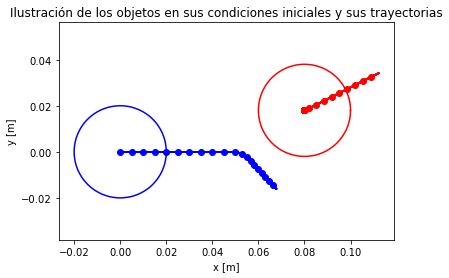

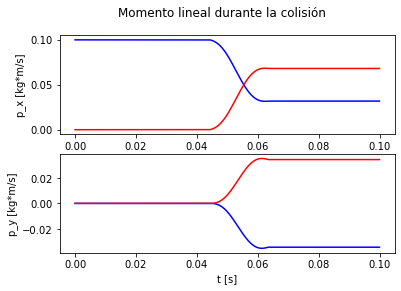

In [26]:
plt.figure(1)
xmin = min(min(rA[:,0]-R),min(rB[:,0]-R))
xmax = max(max(rA[:,0]+R),max(rB[:,0]+R))
ymin = min(min(rA[:,1]-R),min(rB[:,1]-R))
ymax = max(max(rA[:,1]+R),max(rB[:,1]+R))
theta = np.linspace(0,2*np.pi,100)
xcirc = R*np.cos(theta)
ycirc = R*np.sin(theta)
for i in range(0,n,50):
    plt.plot(rA[:,0],rA[:,1],'-b',rB[:,0],rB[:,1],'-r',
        [rA[i,0]],[rA[i,1]],'ob',[rB[i,0]],[rB[i,1]],'or')    
x = rA[0,0] + xcirc
y = rA[0,1] + ycirc
plt.plot(x,y,'-b')
x = rB[0,0] + xcirc
y = rB[0,1] + ycirc
plt.title('Ilustración de los objetos en sus condiciones iniciales y sus trayectorias')
plt.plot(x,y,'-r')
plt.axis('equal')
plt.xlabel('x [m]')
plt.ylabel('y [m]')


plt.figure(2)
pA = vA.copy()*mA
pB = vB.copy()*mB
plt.suptitle('Momento lineal durante la colisión')
plt.subplot(2,1,1)
plt.plot(t,pA[:,0],'-b',t,pB[:,0],'-r')
plt.xlabel('t [s]')
plt.ylabel('p_x [kg*m/s]')
plt.subplot(2,1,2)
plt.plot(t,pA[:,1],'-b',t,pB[:,1],'-r');
plt.xlabel('t [s]')
plt.ylabel('p_y [kg*m/s]');

Este programa sirve como base para estudiar e ilustrar colisiones, con valores de $\eta$ en el rango de $1 kg/s < \eta < 10 kg/s$